In [1]:
%load_ext autoreload
%autoreload 2

This follows the setup of ppd_y1_data.ipynb, but there are some different configurations.  This particular notebook has locations set to the Ohio Supercomputer (and some things like the sys.path.append call below are unnecessary if you are in the `ppd/postprocessing directory`).

In [2]:
import sys
#sys.path.append("/users/PCON0003/cond0080/src/y3-3x2pt-ppd/postprocessing")
import utils_6x2 as util
import utils_ppd as ppd
import utils_ppd_plots as ppd_plots
import utils_ppd_calib as calib
from astropy.io import fits

from tqdm.auto import tqdm, trange

import castor as ca
import pickle

In [3]:
path_ppd = '../'
# path_chain = '../../trimmed_chains/'
path_chain = '../../trimmed_chains_test/'
# path_chain = '/project/projectdirs/des/www/y3_chains/3x2pt/final_paper_chains/'
path_dv = '../../../data/des-y3/'

DATAFILE = '2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits'

fiducial_dv = '2pt_NG_final_2ptunblind_02_26_21_wnz_maglim_covupdate.fits'

In [4]:
main_subsets = ['full', '1x2', '2x2', 'xip', 'xim', 'gammat', 'wtheta']

# 3x2 goodness of fit

In [5]:
a = np.loadtxt('../../trimmed_chains/chain_3x2pt_lcdm_SR_maglim_boosted.txt')

with open('../../trimmed_chains/chain_3x2pt_lcdm_SR_maglim_boosted.txt', 'r') as f:
    header = f.readline()
    
np.savetxt('../../trimmed_chains_test/chain_3x2pt_lcdm_SR_maglim_boosted.txt', a[:222000], header=header[2:-1])

In [6]:
with open('../../trimmed_chains_test/chain_3x2pt_lcdm_SR_maglim_boosted.txt', 'r') as f:
    print(f.readline())#[1:].split())

# cosmological_parameters--omega_m cosmological_parameters--h0 cosmological_parameters--omega_b cosmological_parameters--n_s cosmological_parameters--a_s cosmological_parameters--omnuh2 shear_calibration_parameters--m1 shear_calibration_parameters--m2 shear_calibration_parameters--m3 shear_calibration_parameters--m4 wl_photoz_errors--bias_1 wl_photoz_errors--bias_2 wl_photoz_errors--bias_3 wl_photoz_errors--bias_4 lens_photoz_errors--bias_1 lens_photoz_errors--bias_2 lens_photoz_errors--bias_3 lens_photoz_errors--bias_4 lens_photoz_errors--width_1 lens_photoz_errors--width_2 lens_photoz_errors--width_3 lens_photoz_errors--width_4 bias_lens--b1 bias_lens--b2 bias_lens--b3 bias_lens--b4 intrinsic_alignment_parameters--a1 intrinsic_alignment_parameters--a2 intrinsic_alignment_parameters--alpha1 intrinsic_alignment_parameters--alpha2 intrinsic_alignment_parameters--bias_ta weight



In [7]:
RUN_NAME = '3x2pt_lcdm_SR_maglim_boosted'
RUN_NAME_PPD = 'maglim_3x2_goodnessoffit'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    chunks=222,
    size_chunk=1000,
    data_sets=['xip', 'xim', 'gammat', 'wtheta'],
    load_dvs=False,

)


###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_3x2_goodnessoffit/ppd_chain_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

In [8]:
res_pcal = []

pvals_subsets={k:None for k in['xip','xim', 'gammat','wtheta','1x2','2x2']}

import sys, os

# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__

for _ in trange(10):
    #blockPrint()
    temp = calib.calibrate_pvals(
        path_ppd=path_ppd,
        path_chain=path_chain,
        path_dv=path_dv,
        RUN_NAME=RUN_NAME,
        RUN_NAME_PPD=RUN_NAME_PPD,
        DATAFILE=DATAFILE,
        fiducial_dv=fiducial_dv,
        data_sets_d=['xip','xim', 'gammat','wtheta'],
        data_sets_dprime=['xip','xim', 'gammat','wtheta'],
        N=1000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
        title=RUN_NAME_PPD,
            pval_data=res[0]['full'],
        use_pm=True,
#         use_pm=False,
        clip_is=0.1,
        ndraws=1,
        chunks=222,
        size_chunk=1000,
    #     pvals_subsets=res[0],
        #use_logit=(1e-6,1),
        get_zbin_pair_pcal=False,
        pvals_subsets=pvals_subsets,
#         sample_from='fiducial_dv'  # Trying this (different from y1 notebook)
        sample_from='best-fit'  # Trying this (different from y1 notebook)
    )
    res_pcal.append(temp)
    #enablePrint()
    pickle.dump(res_pcal, open('res_pcal_'+RUN_NAME_PPD+'.pickle', 'wb'))
    


###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_3x2_goodnessoffit/ppd_chain_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 462
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.365
cosmological_parameters--h0 = 0.56
cosmological_parameters--omega_b = 0.0343
cosmological_parameters--n_s = 1.03
cosmological_parameters--a_s = 2.27e-09
cosmological_parameters--omnuh2 = 0.00524
shear_calibration_parameters--m1 = -0.00157
shear_calibration_pa

/global/cfs/cdirs/des/xuod/DES_Y3_3x2/y3-3x2pt/code/ppd/postprocessing/utils_ppd_calib.py:77: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, C))
  return np.dot(A,B)




###############################
## Compute IS weights for d ###
###############################



(222000, 1000)
Neff = 77.0 (median), 16th=31.9, 84th=228.5 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
Appending pval for 1x2 0.18773534563631017
2x2
Appending pval for 2x2 0.0019679558580936816
gammat
Appending pval for gammat 0.0016313191636662776
wtheta
Appending pval for wtheta 0.3029991333476307
xim
Appending pval for xim 0.3469528684715754
xip
Appending pval for xip 0.22335435844031534

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0220 (raw pval=0.0123)
     - 1x2          calibrated pval=0.1980 (raw pval=0.1877)
     - 2x2          calibrated pval=0.0100 (raw pval=0.0020)
     - gammat       calibrated pval=0.0040 (raw pval=0.0016)
     - wtheta       calibrated pval=0.2970 (raw pval=0.3030)
     - xim          calibrated pval=0.3760 (raw pval=0.3470)
     - xip          calibrated pval=0.2310 (raw pval=0.2234)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
#################

Loading list chain at
../maglim_3x2_goodnessoffit/ppd_chain_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 462
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.365
cosmological_parameters--h0 = 0.56
cosmological_parameters--omega_b = 0.0343
cosmological_parameters--n_s = 1.03
cosmological_parameters--a_s = 2.27e-09
cosmological_parameters--omnuh2 = 0.00524
shear_calibration_parameters--m1 = -0.00157
shear_calibration_pa



###############################
## Compute IS weights for d ###
###############################



(222000, 1000)
Neff = 76.8 (median), 16th=31.4, 84th=236.1 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0210 (raw pval=0.0123)
     - 1x2          calibrated pval=0.2140 (raw pval=0.1877)
     - 2x2          calibrated pval=0.0080 (raw pval=0.0020)
     - gammat       calibrated pval=0.0060 (raw pval=0.0016)
     - wtheta       calibrated pval=0.2980 (raw pval=0.3030)
     - xim          calibrated pval=0.3650 (raw pval=0.3470)
     - xip          calibrated pval=0.2510 (raw pval=0.2234)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_3x2_goodnessoffit/ppd_chain_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 462
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.365
cosmological_parameters--h0 = 0.56
cosmological_parameters--omega_b = 0.0343
cosmological_parameters--n_s = 1.03
cosmological_parameters--a_s = 2.27e-09
cosmological_parameters--omnuh2 = 0.00524
shear_calibration_parameters--m1 = -0.00157
shear_calibration_pa



###############################
## Compute IS weights for d ###
###############################



(222000, 1000)
Neff = 82.5 (median), 16th=33.5, 84th=255.5 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0220 (raw pval=0.0123)
     - 1x2          calibrated pval=0.2040 (raw pval=0.1877)
     - 2x2          calibrated pval=0.0070 (raw pval=0.0020)
     - gammat       calibrated pval=0.0090 (raw pval=0.0016)
     - wtheta       calibrated pval=0.2830 (raw pval=0.3030)
     - xim          calibrated pval=0.3370 (raw pval=0.3470)
     - xip          calibrated pval=0.2470 (raw pval=0.2234)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_3x2_goodnessoffit/ppd_chain_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 462
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.365
cosmological_parameters--h0 = 0.56
cosmological_parameters--omega_b = 0.0343
cosmological_parameters--n_s = 1.03
cosmological_parameters--a_s = 2.27e-09
cosmological_parameters--omnuh2 = 0.00524
shear_calibration_parameters--m1 = -0.00157
shear_calibration_pa



###############################
## Compute IS weights for d ###
###############################



(222000, 1000)
Neff = 80.2 (median), 16th=29.3, 84th=227.4 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0180 (raw pval=0.0123)
     - 1x2          calibrated pval=0.2020 (raw pval=0.1877)
     - 2x2          calibrated pval=0.0090 (raw pval=0.0020)
     - gammat       calibrated pval=0.0070 (raw pval=0.0016)
     - wtheta       calibrated pval=0.3050 (raw pval=0.3030)
     - xim          calibrated pval=0.3560 (raw pval=0.3470)
     - xip          calibrated pval=0.2440 (raw pval=0.2234)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_3x2_goodnessoffit/ppd_chain_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 462
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.365
cosmological_parameters--h0 = 0.56
cosmological_parameters--omega_b = 0.0343
cosmological_parameters--n_s = 1.03
cosmological_parameters--a_s = 2.27e-09
cosmological_parameters--omnuh2 = 0.00524
shear_calibration_parameters--m1 = -0.00157
shear_calibration_pa



###############################
## Compute IS weights for d ###
###############################



(222000, 1000)
Neff = 79.1 (median), 16th=30.3, 84th=237.1 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0190 (raw pval=0.0123)
     - 1x2          calibrated pval=0.1800 (raw pval=0.1877)
     - 2x2          calibrated pval=0.0050 (raw pval=0.0020)
     - gammat       calibrated pval=0.0050 (raw pval=0.0016)
     - wtheta       calibrated pval=0.2950 (raw pval=0.3030)
     - xim          calibrated pval=0.3260 (raw pval=0.3470)
     - xip          calibrated pval=0.2410 (raw pval=0.2234)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_3x2_goodnessoffit/ppd_chain_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 462
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.365
cosmological_parameters--h0 = 0.56
cosmological_parameters--omega_b = 0.0343
cosmological_parameters--n_s = 1.03
cosmological_parameters--a_s = 2.27e-09
cosmological_parameters--omnuh2 = 0.00524
shear_calibration_parameters--m1 = -0.00157
shear_calibration_pa



###############################
## Compute IS weights for d ###
###############################



(222000, 1000)
Neff = 79.3 (median), 16th=32.0, 84th=231.4 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0130 (raw pval=0.0123)
     - 1x2          calibrated pval=0.1870 (raw pval=0.1877)
     - 2x2          calibrated pval=0.0090 (raw pval=0.0020)
     - gammat       calibrated pval=0.0080 (raw pval=0.0016)
     - wtheta       calibrated pval=0.2790 (raw pval=0.3030)
     - xim          calibrated pval=0.3420 (raw pval=0.3470)
     - xip          calibrated pval=0.2400 (raw pval=0.2234)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_3x2_goodnessoffit/ppd_chain_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 462
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.365
cosmological_parameters--h0 = 0.56
cosmological_parameters--omega_b = 0.0343
cosmological_parameters--n_s = 1.03
cosmological_parameters--a_s = 2.27e-09
cosmological_parameters--omnuh2 = 0.00524
shear_calibration_parameters--m1 = -0.00157
shear_calibration_pa



###############################
## Compute IS weights for d ###
###############################



(222000, 1000)
Neff = 76.7 (median), 16th=32.4, 84th=212.8 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip


###############################
## Compute IS weights for d ###
###############################



(222000, 1000)
Neff = 76.7 (median), 16th=32.4, 84th=220.6 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0250 (raw pval=0.0123)
     - 1x2          calibrated pval=0.1880 (raw pval=0.1877)
     - 2x2          calibrated pval=0.0140 (raw pval=0.0020)
     - gammat       calibrated pval=0.0110 (raw pval=0.0016)
     - wtheta       calibrated pval=0.2840 (raw pval=0.3030)
     - xim          calibrated pval=0.3530 (raw pval=0.3470)
     - xip          calibrated pval=0.2310 (raw pval=0.2234)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_3x2_goodnessoffit/ppd_chain_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 462
 - number of realizations = 1000
Loading realizations from  ../maglim_3x2_goodnessoffit/ppd_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0_d_theory.npy
 - data vector size = 462
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.365
cosmological_parameters--h0 = 0.56
cosmological_parameters--omega_b = 0.0343
cosmological_parameters--n_s = 1.03
cosmological_parameters--a_s = 2.27e-09
cosmological_parameters--omnuh2 = 0.00524
shear_calibration_parameters--m1 = -0.00157
shear_calibration_pa



###############################
## Compute IS weights for d ###
###############################



(222000, 1000)
Neff = 76.0 (median), 16th=34.6, 84th=221.4 (0 were nan's)

###############################
## Computing p-values #########
###############################



1x2
2x2
gammat
wtheta
xim
xip

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0250 (raw pval=0.0123)
     - 1x2          calibrated pval=0.1980 (raw pval=0.1877)
     - 2x2          calibrated pval=0.0120 (raw pval=0.0020)
     - gammat       calibrated pval=0.0090 (raw pval=0.0016)
     - wtheta       calibrated pval=0.2730 (raw pval=0.3030)
     - xim          calibrated pval=0.3570 (raw pval=0.3470)
     - xip          calibrated pval=0.2460 (raw pval=0.2234)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_3x2_goodnessoffit/ppd_chain_3x2pt_lcdm_SR_maglim_boosted_maglim_3x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



### With pm

In [9]:
pvals_rsd = np.concatenate([r[0] for r in res_pcal])

In [10]:
pvals_rsd.shape

(10000,)

0.0213


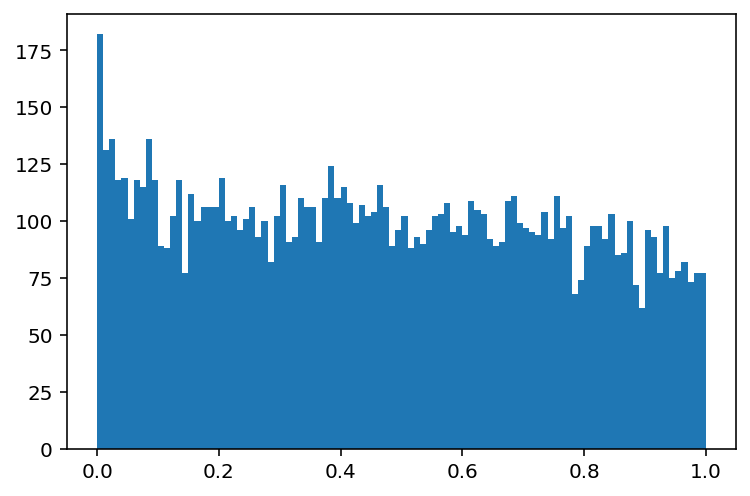

In [11]:
plt.hist(pvals_rsd, 100);
print(np.sum(pvals_rsd<=0.0122)/10000)

(array([  2.,  20.,  54., 150., 219., 244., 175.,  88.,  36.,  12.]),
 array([0.0165 , 0.01741, 0.01832, 0.01923, 0.02014, 0.02105, 0.02196,
        0.02287, 0.02378, 0.02469, 0.0256 ]),
 <a list of 10 Patch objects>)

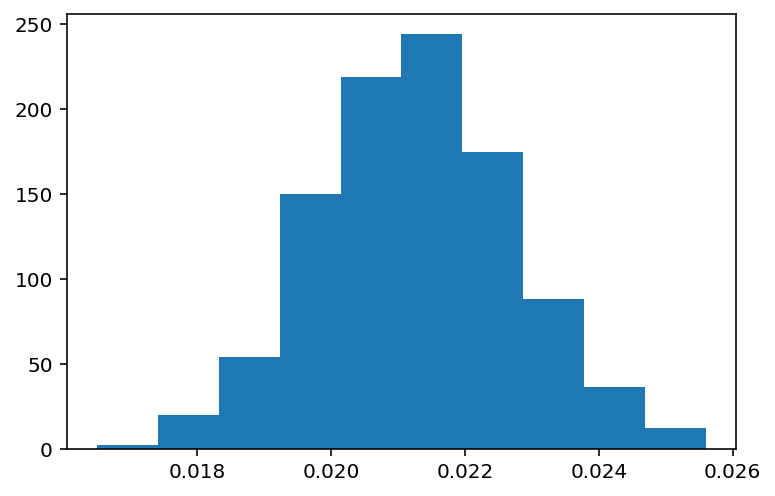

In [12]:
plt.hist([np.sum(np.random.choice(pvals_rsd,size=len(pvals_rsd),replace=True)<=0.0122)/10000 for _ in trange(1000)])

xip 0.22335435844031534 0.2411
xim 0.3469528684715754 0.351
gammat 0.0016313191636662776 0.0075
wtheta 0.3029991333476307 0.2934
1x2 0.18773534563631017 0.1977
2x2 0.0019679558580936816 0.01


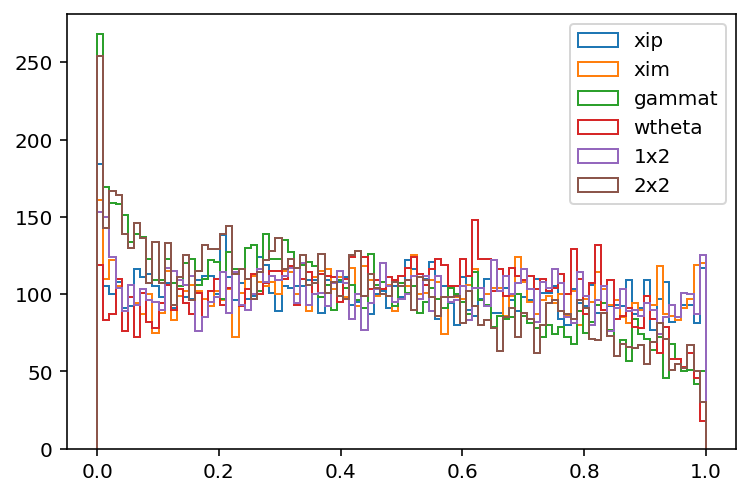

In [13]:
for key in pvals_subsets.keys():
    _p = np.concatenate([r[1][key] for r in res_pcal])
    print(key, pvals_subsets[key], np.sum(_p<=pvals_subsets[key])/len(_p))
    plt.hist(_p, np.linspace(0,1,100), histtype='step', label=key);
plt.legend()

# 2x2 goodness of fit

In [14]:
a = np.loadtxt('../../trimmed_chains/chain_2x2pt_lcdm_SR_maglim_boosted.txt')

with open('../../trimmed_chains/chain_2x2pt_lcdm_SR_maglim_boosted.txt', 'r') as f:
    header = f.readline()
    
np.savetxt('../../trimmed_chains_test/chain_2x2pt_lcdm_SR_maglim_boosted.txt', a[:221000], header=header[2:-1])

In [15]:
with open('../../trimmed_chains_test/chain_2x2pt_lcdm_SR_maglim_boosted.txt', 'r') as f:
    print(f.readline())#[1:].split())

# cosmological_parameters--omega_m cosmological_parameters--h0 cosmological_parameters--omega_b cosmological_parameters--n_s cosmological_parameters--a_s cosmological_parameters--omnuh2 shear_calibration_parameters--m1 shear_calibration_parameters--m2 shear_calibration_parameters--m3 shear_calibration_parameters--m4 wl_photoz_errors--bias_1 wl_photoz_errors--bias_2 wl_photoz_errors--bias_3 wl_photoz_errors--bias_4 lens_photoz_errors--bias_1 lens_photoz_errors--bias_2 lens_photoz_errors--bias_3 lens_photoz_errors--bias_4 lens_photoz_errors--width_1 lens_photoz_errors--width_2 lens_photoz_errors--width_3 lens_photoz_errors--width_4 bias_lens--b1 bias_lens--b2 bias_lens--b3 bias_lens--b4 intrinsic_alignment_parameters--a1 intrinsic_alignment_parameters--a2 intrinsic_alignment_parameters--alpha1 intrinsic_alignment_parameters--alpha2 intrinsic_alignment_parameters--bias_ta weight



In [16]:
RUN_NAME = '2x2pt_lcdm_SR_maglim_boosted'
RUN_NAME_PPD = 'maglim_2x2_goodnessoffit'

res = ppd.load_run(
    path_ppd=path_ppd,
    path_chain=path_chain,
    path_dv=path_dv,
    RUN_NAME=RUN_NAME,
    RUN_NAME_PPD=RUN_NAME_PPD,
    DATAFILE=DATAFILE,
    chunks=221,
    size_chunk=1000,
    data_sets=['xip', 'xim', 'gammat', 'wtheta'],
    load_dvs=False,

)


###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_2x2_goodnessoffit/ppd_chain_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

/global/cfs/cdirs/des/xuod/DES_Y3_3x2/y3-3x2pt/code/ppd/postprocessing/utils_ppd.py:65: RuntimeWarning: invalid value encountered in greater_equal
  _p.append(np.average(np.random.binomial(1, p=comp_avg), weights=weights))


     - GAMMAT   pval=0.0032 +0.0002/-0.0002  [16=0.0030, 50=0.0032, 84=0.0034] (0.003521658593223871)
     - WTHETA   pval=0.3303 +0.0017/-0.0017  [16=0.3285, 50=0.3303, 84=0.3320] (0.3289974936856762)
     - 2X2      pval=0.0039 +0.0002/-0.0002  [16=0.0037, 50=0.0039, 84=0.0041] (0.004107687351481381)

###############################
## Loading scale/bin cuts #####
###############################
Found observables in data_file ['xip', 'xim', 'gammat', 'wtheta']
Reading options for likelihood module:  2pt_dprime_like
Found scale cuts for  {'xip': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'xim': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 2), (2, 3), (2, 4), (3, 3), (3, 4), (4, 4)], 'gammat': [(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4), (5, 1), (5, 2), (5, 3), (5, 4), (6, 1), (6, 2), (6, 3), (6, 4)], 'wtheta': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 2), (2, 3


###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_2x2_goodnessoffit/ppd_chain_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 235
 - number of realizations = 1000
Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 235
 - number of realizations = 1000
Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_d_theory.npy
 - data vector size = 235
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.395
cosmological_parameters--h0 = 0.58
cosmological_parameters--omega_b = 0.0399
cosmological_parameters--n_s = 0.953
cosmological_parameters--a_s = 1.89e-09
cosmological_parameters--omnuh2 = 0.00639
shear_calibration_parameters--m1 = -0.0161
shear_calibration_pa



###############################
## Compute IS weights for d ###
###############################



(221000, 100)
Neff = 53.3 (median), 16th=22.8, 84th=169.6 (0 were nan's)

###############################
## Computing p-values #########
###############################



2x2
Appending pval for 2x2 0.004085456706555616
gammat
Appending pval for gammat 0.0036633316340008897
wtheta
Appending pval for wtheta 0.3286423252947713

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0200 (raw pval=0.0039)
     - 2x2          calibrated pval=0.0200 (raw pval=0.0041)
     - gammat       calibrated pval=0.0100 (raw pval=0.0037)
     - wtheta       calibrated pval=0.3500 (raw pval=0.3286)

###############################
## Plotting ###################
###############################


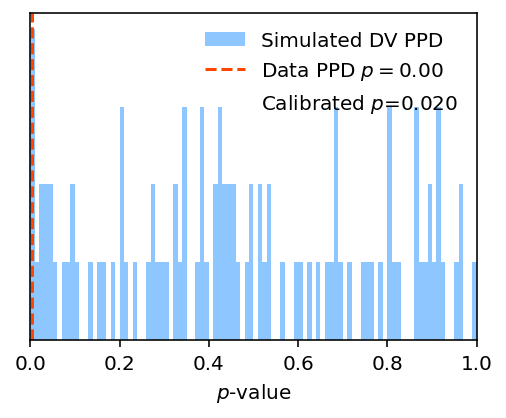

In [17]:
pvals_subsets={k:None for k in['xip','xim', 'gammat','wtheta','1x2','2x2']}

temp = calib.calibrate_pvals(
        path_ppd=path_ppd,
        path_chain=path_chain,
        path_dv=path_dv,
        RUN_NAME=RUN_NAME,
        RUN_NAME_PPD=RUN_NAME_PPD,
        DATAFILE=DATAFILE,
        fiducial_dv=fiducial_dv,
        data_sets_d=['gammat','wtheta'],
        data_sets_dprime=['gammat','wtheta'],
        N=100, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
        title=RUN_NAME_PPD,
            pval_data=res[0]['full'],
        use_pm=True,
        clip_is=0.1,
        ndraws=1,
        chunks=221,
        size_chunk=1000,
    #     pvals_subsets=res[0],
        #use_logit=(1e-6,1),
        get_zbin_pair_pcal=False,
        pvals_subsets=pvals_subsets,
#         sample_from='fiducial_dv'  # Trying this (different from y1 notebook)
        sample_from='best-fit'  # Trying this (different from y1 notebook)
    )

In [18]:
res_pcal = []

pvals_subsets={k:None for k in['xip','xim', 'gammat','wtheta','1x2','2x2']}

import sys, os

# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

# Restore
def enablePrint():
    sys.stdout = sys.__stdout__

for _ in trange(10):
    #blockPrint()
    temp = calib.calibrate_pvals(
        path_ppd=path_ppd,
        path_chain=path_chain,
        path_dv=path_dv,
        RUN_NAME=RUN_NAME,
        RUN_NAME_PPD=RUN_NAME_PPD,
        DATAFILE=DATAFILE,
        fiducial_dv=fiducial_dv,
        data_sets_d=['gammat','wtheta'],
        data_sets_dprime=['gammat','wtheta'],
        N=1000, # 10^4 should give reasonable results, but for memory-sake can try smaller like 100
        title=RUN_NAME_PPD,
            pval_data=res[0]['full'],
        use_pm=True,
#         use_pm=False,
        clip_is=0.1,
        ndraws=1,
        chunks=221,
        size_chunk=1000,
    #     pvals_subsets=res[0],
        #use_logit=(1e-6,1),
        get_zbin_pair_pcal=False,
        pvals_subsets=pvals_subsets,
#         sample_from='fiducial_dv'  # Trying this (different from y1 notebook)
        sample_from='best-fit'  # Trying this (different from y1 notebook)
    )
    res_pcal.append(temp)
    #enablePrint()
    pickle.dump(res_pcal, open('res_pcal_'+RUN_NAME_PPD+'.pickle', 'wb'))
    


###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_2x2_goodnessoffit/ppd_chain_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 235
 - number of realizations = 1000
Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 235
 - number of realizations = 1000
Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_d_theory.npy
 - data vector size = 235
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.395
cosmological_parameters--h0 = 0.58
cosmological_parameters--omega_b = 0.0399
cosmological_parameters--n_s = 0.953
cosmological_parameters--a_s = 1.89e-09
cosmological_parameters--omnuh2 = 0.00639
shear_calibration_parameters--m1 = -0.0161
shear_calibration_pa



###############################
## Compute IS weights for d ###
###############################



(221000, 1000)
Neff = 54.4 (median), 16th=24.6, 84th=191.5 (0 were nan's)

###############################
## Computing p-values #########
###############################



2x2
Appending pval for 2x2 0.004085456706555616
gammat
Appending pval for gammat 0.0036633316340008897
wtheta
Appending pval for wtheta 0.3286423252947713

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0180 (raw pval=0.0039)
     - 2x2          calibrated pval=0.0190 (raw pval=0.0041)
     - gammat       calibrated pval=0.0140 (raw pval=0.0037)
     - wtheta       calibrated pval=0.3320 (raw pval=0.3286)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_2x2_goodnessoffit/ppd_chain_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 235
 - number of realizations = 1000
Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 235
 - number of realizations = 1000
Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_d_theory.npy
 - data vector size = 235
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.395
cosmological_parameters--h0 = 0.58
cosmological_parameters--omega_b = 0.0399
cosmological_parameters--n_s = 0.953
cosmological_parameters--a_s = 1.89e-09
cosmological_parameters--omnuh2 = 0.00639
shear_calibration_parameters--m1 = -0.0161
shear_calibration_pa



###############################
## Compute IS weights for d ###
###############################



(221000, 1000)
Neff = 53.5 (median), 16th=23.5, 84th=181.9 (0 were nan's)

###############################
## Computing p-values #########
###############################



2x2
gammat
wtheta

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0160 (raw pval=0.0039)
     - 2x2          calibrated pval=0.0160 (raw pval=0.0041)
     - gammat       calibrated pval=0.0110 (raw pval=0.0037)
     - wtheta       calibrated pval=0.3710 (raw pval=0.3286)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_2x2_goodnessoffit/ppd_chain_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 235
 - number of realizations = 1000
Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 235
 - number of realizations = 1000
Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_d_theory.npy
 - data vector size = 235
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.395
cosmological_parameters--h0 = 0.58
cosmological_parameters--omega_b = 0.0399
cosmological_parameters--n_s = 0.953
cosmological_parameters--a_s = 1.89e-09
cosmological_parameters--omnuh2 = 0.00639
shear_calibration_parameters--m1 = -0.0161
shear_calibration_pa

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)





###############################
## Compute IS weights for d ###
###############################



(221000, 1000)
Neff = 58.3 (median), 16th=23.1, 84th=198.9 (0 were nan's)

###############################
## Computing p-values #########
###############################



2x2
gammat
wtheta

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0190 (raw pval=0.0039)
     - 2x2          calibrated pval=0.0190 (raw pval=0.0041)
     - gammat       calibrated pval=0.0150 (raw pval=0.0037)
     - wtheta       calibrated pval=0.3490 (raw pval=0.3286)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_2x2_goodnessoffit/ppd_chain_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 235
 - number of realizations = 1000
Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 235
 - number of realizations = 1000
Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_d_theory.npy
 - data vector size = 235
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.395
cosmological_parameters--h0 = 0.58
cosmological_parameters--omega_b = 0.0399
cosmological_parameters--n_s = 0.953
cosmological_parameters--a_s = 1.89e-09
cosmological_parameters--omnuh2 = 0.00639
shear_calibration_parameters--m1 = -0.0161
shear_calibration_pa



###############################
## Compute IS weights for d ###
###############################



(221000, 1000)
Neff = 54.8 (median), 16th=24.4, 84th=176.1 (0 were nan's)

###############################
## Computing p-values #########
###############################



2x2
gammat
wtheta

###############################
## Calibrated p-values ########
###############################
     - Full         calibrated pval=0.0200 (raw pval=0.0039)
     - 2x2          calibrated pval=0.0200 (raw pval=0.0041)
     - gammat       calibrated pval=0.0140 (raw pval=0.0037)
     - wtheta       calibrated pval=0.3410 (raw pval=0.3286)

###############################
## Plotting ###################
###############################

###############################
## Loading chains #############
###############################


Loading list chain at
../maglim_2x2_goodnessoffit/ppd_chain_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0.txt
- using params
['cosmological_parameters--omega_m', 'cosmological_parameters--h0', 'cosmological_parameters--omega_b', 'cosmological_parameters--n_s', 'cosmological_parameters--a_s', 'cosmological_parameters--omnuh2', 'cosmological_parameters--w', 'cosmological_parameters--massive_nu', 'cosmological_parameters--massless_nu', 'cosmological_parameters--omega_k', 'cosmological_parameters--tau', 'shear_calibration_parameters--m1', 'shear_calibration_parameters--m2', 'shear_calibration_parameters--m3', 'shear_calibration_parameters--m4', 'wl_photoz_errors--bias_1', 'wl_photoz_errors--bias_2', 'wl_photoz_errors--bias_3', 'wl_photoz_errors--bias_4', 'lens_photoz_errors--bias_1', 'lens_photoz_errors--bias_2', 'lens_photoz_errors--bias_3', 'lens_photoz_errors--bias_4', 'lens_photoz_errors--bias_5', 'lens_photoz_errors--width_1', 'lens_photoz_errors--width_2', 'lens_photoz_erro

Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_dprime_theory.npy
 - data vector size = 235
 - number of realizations = 1000
Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_dprime_real.npy
 - data vector size = 235
 - number of realizations = 1000
Loading realizations from  ../maglim_2x2_goodnessoffit/ppd_2x2pt_lcdm_SR_maglim_boosted_maglim_2x2_goodnessoffit_0_d_theory.npy
 - data vector size = 235
 - number of realizations = 1000


###############################
## Sampling data ##############
###############################
Sampling at best-fit with params
cosmological_parameters--omega_m = 0.395
cosmological_parameters--h0 = 0.58
cosmological_parameters--omega_b = 0.0399
cosmological_parameters--n_s = 0.953
cosmological_parameters--a_s = 1.89e-09
cosmological_parameters--omnuh2 = 0.00639
shear_calibration_parameters--m1 = -0.0161
shear_calibration_pa



###############################
## Compute IS weights for d ###
###############################



(221000, 1000)
Neff = 58.1 (median), 16th=24.1, 84th=184.8 (0 were nan's)

###############################
## Computing p-values #########
###############################


IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



### With pm

In [19]:
pvals_rsd = np.concatenate([r[0] for r in res_pcal])

In [20]:
pvals_rsd.shape

(10000,)

0.018


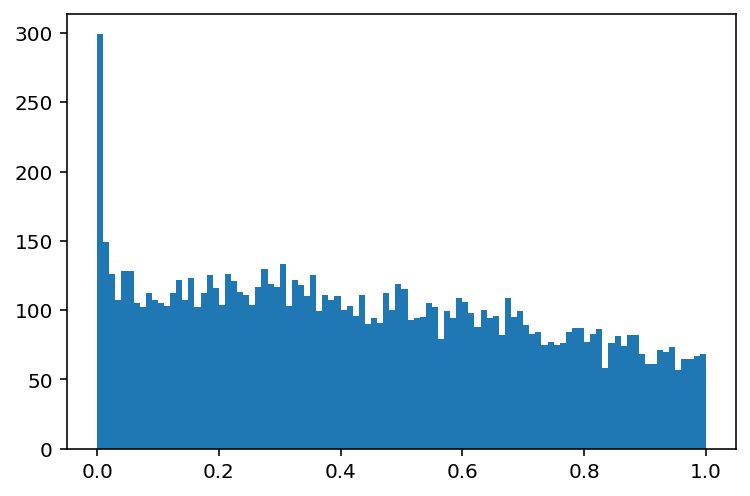

In [21]:
plt.hist(pvals_rsd, 100);
print(np.sum(pvals_rsd<=0.0039)/10000)

(array([  2.,  15., 103., 187., 230., 239., 153.,  49.,  17.,   5.]),
 array([0.0137 , 0.01459, 0.01548, 0.01637, 0.01726, 0.01815, 0.01904,
        0.01993, 0.02082, 0.02171, 0.0226 ]),
 <a list of 10 Patch objects>)

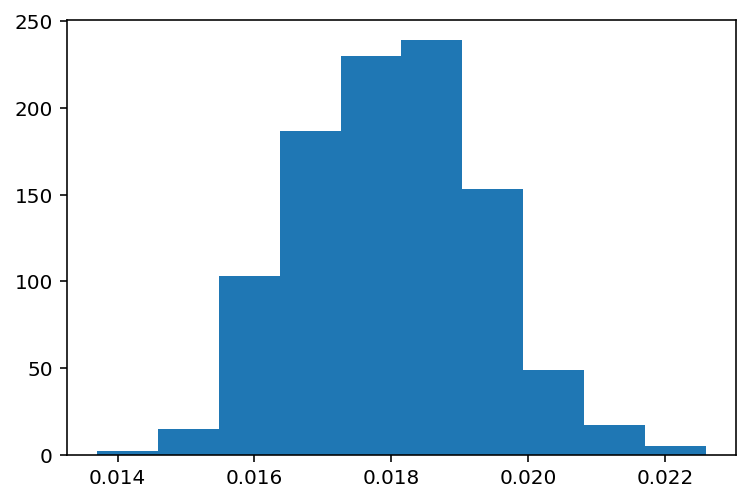

In [22]:
plt.hist([np.sum(np.random.choice(pvals_rsd,size=len(pvals_rsd),replace=True)<=0.0039)/10000 for _ in trange(1000)])

gammat 0.0036633316340008897 0.0126
wtheta 0.3286423252947713 0.3464
2x2 0.004085456706555616 0.0185


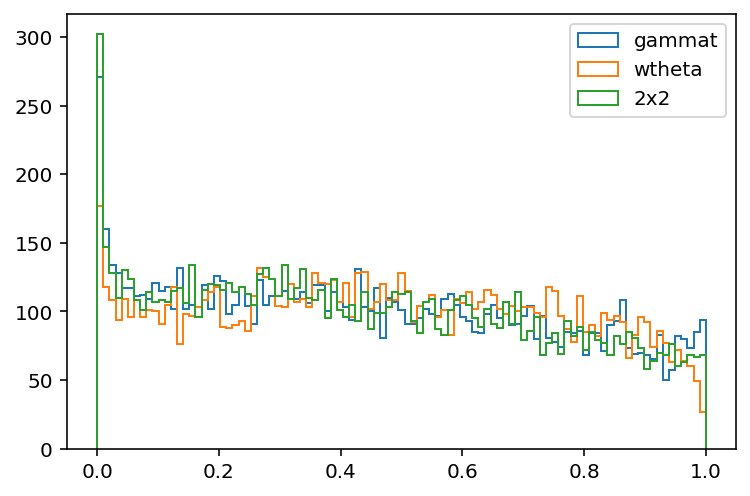

In [23]:
for key in ['gammat', 'wtheta', '2x2']:# pvals_subsets.keys():
    _p = np.concatenate([r[1][key] for r in res_pcal])
    print(key, pvals_subsets[key], np.sum(_p<=pvals_subsets[key])/len(_p))
    plt.hist(_p, np.linspace(0,1,100), histtype='step', label=key);
plt.legend()